In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [17]:
df = pd.read_csv("../Data/iris_dataset.csv")

# (Versicolor, Virginica)
df = df[df["species"].isin(["versicolor", "virginica"])]

# Versicolor -> 0, Virginica -> 1
df["species"] = df["species"].map({"versicolor": 0, "virginica": 1})

X = df.iloc[:, :-1].values
y_binary = df["species"].values

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

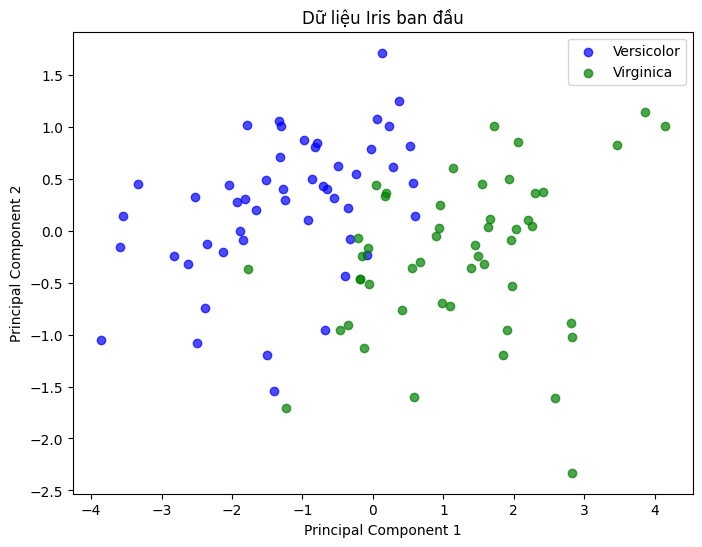

In [19]:
# PCA 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[y_binary == 0, 0], X_pca_2d[y_binary == 0, 1], label="Versicolor", alpha=0.7, c='blue')
plt.scatter(X_pca_2d[y_binary == 1, 0], X_pca_2d[y_binary == 1, 1], label="Virginica", alpha=0.7, c='green')
plt.title("Dữ liệu Iris ban đầu")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

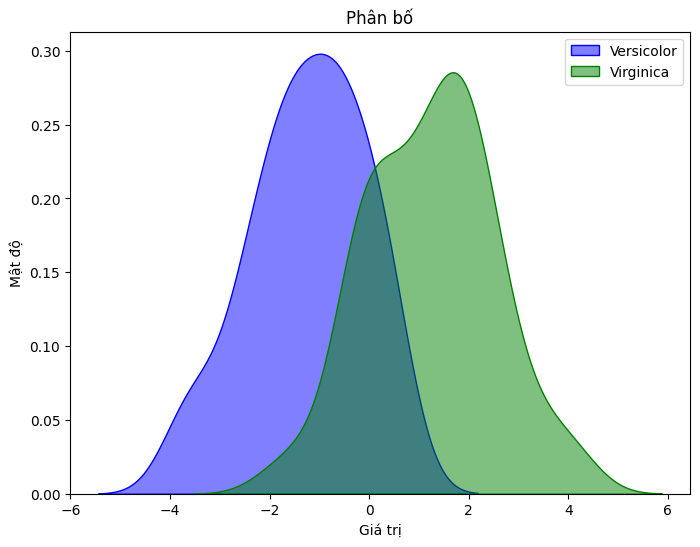

In [20]:
# KDE Plot (PCA 1D)
X_pca_1d = X_pca_2d[:, 0]

plt.figure(figsize=(8, 6))
sns.kdeplot(X_pca_1d[y_binary == 0], label="Versicolor", fill=True, color='blue', alpha=0.5)
sns.kdeplot(X_pca_1d[y_binary == 1], label="Virginica", fill=True, color='green', alpha=0.5)
plt.title("Phân bố")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")
plt.legend()
plt.show()

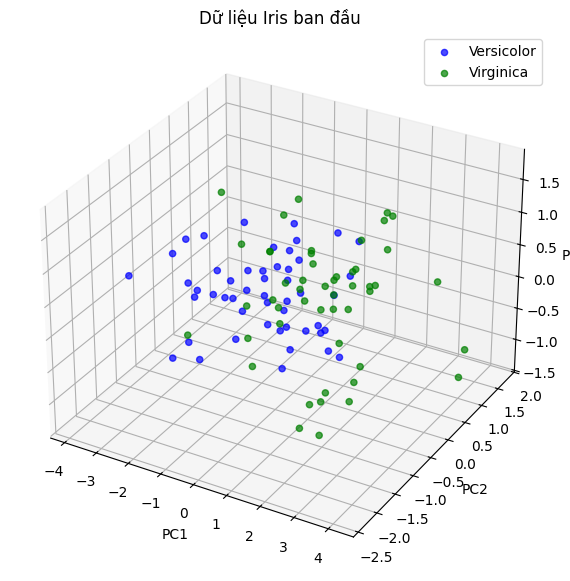

In [21]:
# 5. PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[y_binary == 0, 0], X_pca_3d[y_binary == 0, 1], X_pca_3d[y_binary == 0, 2], 
           label="Versicolor", alpha=0.7, c='blue')
ax.scatter(X_pca_3d[y_binary == 1, 0], X_pca_3d[y_binary == 1, 1], X_pca_3d[y_binary == 1, 2], 
           label="Virginica", alpha=0.7, c='green')

ax.set_title("Dữ liệu Iris ban đầu")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

In [22]:
# LDA
# Calculate mean of each class
mean_0 = np.mean(X_scaled[y_binary == 0], axis=0)
mean_1 = np.mean(X_scaled[y_binary == 1], axis=0)

# Calculate scatter within-class (SW)
SW = np.zeros((X.shape[1], X.shape[1]))
for i, mean in zip([0, 1], [mean_0, mean_1]):
    X_class = X_scaled[y_binary == i]
    SW += (X_class - mean).T @ (X_class - mean)

# Calculate scatter between-class (SB)
SB = np.outer((mean_0 - mean_1), (mean_0 - mean_1))

# Calculate optimal vector
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(SW) @ SB)
w = eigen_vectors[:, np.argmax(eigen_values)].real.reshape(-1, 1)

# Projecting data onto LDA vectors
X_lda = X_scaled @ w

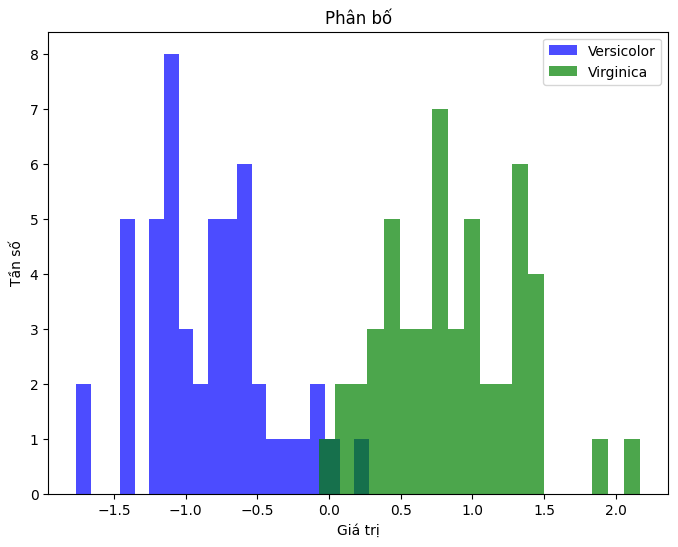

In [23]:
# 8. Visualization data
plt.figure(figsize=(8, 6))
plt.hist(X_lda[y_binary == 0], bins=20, alpha=0.7, label="Versicolor", color='blue')
plt.hist(X_lda[y_binary == 1], bins=20, alpha=0.7, label="Virginica", color='green')
plt.title("Phân bố")
plt.xlabel("Giá trị")
plt.ylabel("Tần số")
plt.legend()
plt.show()

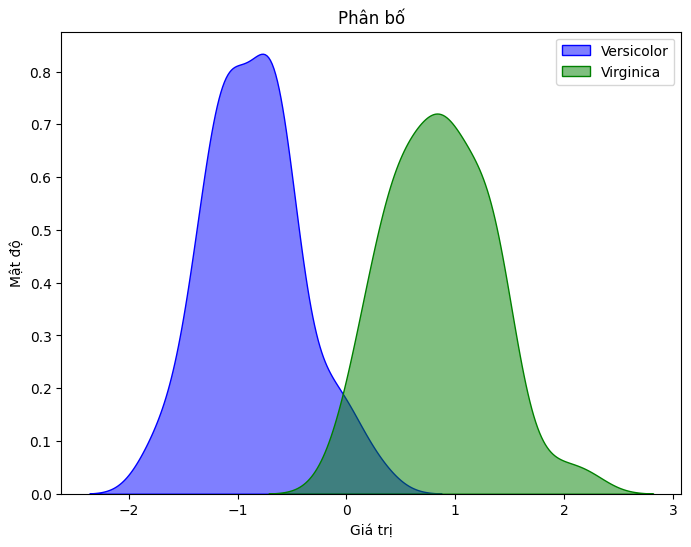

In [24]:
X_lda_1d = X_lda.ravel()

plt.figure(figsize=(8, 6))
sns.kdeplot(X_lda_1d[y_binary == 0], label="Versicolor", fill=True, color='blue', alpha=0.5)
sns.kdeplot(X_lda_1d[y_binary == 1], label="Virginica", fill=True, color='green', alpha=0.5)
plt.title("Phân bố")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")
plt.legend()
plt.show()